In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import hvplot.pandas
import hvplot.dask
from pathlib import Path
from collections import Counter
import matplotlib as mpl
from matplotlib import style
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import seaborn as sns

In [33]:
# Begin SQLAlchemy

from sqlalchemy import create_engine, inspect
from config import password

url= "postgresql://postgres:" + password + "@localhost/Team_Two"
engine = create_engine(url)


In [34]:
# Get the name of the table. 

inspector = inspect(engine)
inspector.get_table_names()

['EMPLOYEES', 'MENTAL_HEALTH']

In [35]:
# Make a connection to the SQL database

conn = engine.connect()

In [36]:
# Using the inspector to print the column names within the 'MENTAL_HEALTH' table in FILE.sqlite and its types

columns = inspector.get_columns('MENTAL_HEALTH')
for column in columns:
    print(column)

{'name': 'ID', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'MENTAL_HEALTH_COVERAGE', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'TECH_COMPANY', 'type': INTEGER(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT', 'type': INTEGER(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'AWARENESS_OF_MENTAL_HEALTH_C

In [53]:
# Query Employees Records in the the Database

df_e = pd.read_sql('SELECT * FROM "EMPLOYEES"', conn)
df_e.head()

ID  AGE  GENDER        COUNTRY_WORKING_IN        WFH
0   0   39    Male            United Kingdom  Sometimes
1   1   29    male  United States of America      Never
2   2   38   Male             United Kingdom     Always
3   3   43    male            United Kingdom  Sometimes
4   4   43  Female  United States of America  Sometimes

In [54]:
# Query Mental_Health Records in the the Database

df_m=pd.read_sql('SELECT * FROM "MENTAL_HEALTH"', conn)
df_m

ID      MENTAL_HEALTH_COVERAGE  TECH_COMPANY  \
0        0  Not eligible for coverage            1.0   
1        1                          No           1.0   
2        2                          No           1.0   
3        3                        None           NaN   
4        4                         Yes           0.0   
...    ...                         ...           ...   
1428  1428                        None           NaN   
1429  1429                        None           NaN   
1430  1430                         Yes           1.0   
1431  1431                I don't know           0.0   
1432  1432                         Yes           1.0   

     MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE  \
0                                    None   
1                                     Yes   
2                                    None   
3                                    None   
4                                     Yes   
...                                   ...   
1428                                 None   
1429                                 None   
1430                                  Yes   
1431                        I am not sure   
1432                                   No   

     EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES  \
0                                        No   
1                                       Yes   
2                                        No   
3                                      None   
4                                        No   
...                                     ...   
1428                                   None   
1429                                   None   
1430                                    Yes   
1431                                    Yes   
1432                                     No   

      MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT  \
0                                                   NaN    
1                                                   NaN    
2                                                   NaN    
3                                                   1.0    
4                                                   NaN    
...                                                 ...    
1428                                                1.0    
1429                                                1.0    
1430                                                NaN    
1431                                                NaN    
1432                                                NaN    

     PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS  \
0                                     No, none did   
1                                Yes, they all did   
2                                     No, none did   
3                                         Some did   
4                                     I don't know   
...                                            ...   
1428                             Yes, they all did   
1429                                          None   
1430                                      Some did   
1431                                  No, none did   
1432                                          None   

     AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS  \
0                             N/A (not currently aware)      
1                                   I was aware of some      
2                             N/A (not currently aware)      
3                             N/A (not currently aware)      
4                             N/A (not currently aware)      
...                                                 ...      
1428                                I was aware of some      
1429                                               None      
1430                                I was aware of some      
1431                          N/A (not currently aware)      
1432                                               None      

     PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES  \
0                                       None did   
1         

In [56]:
# Merge the Two Tables

df=df_e.merge(df_m, how='outer', on='ID')
df.head()

ID  AGE  GENDER        COUNTRY_WORKING_IN        WFH  \
0   0   39    Male            United Kingdom  Sometimes   
1   1   29    male  United States of America      Never   
2   2   38   Male             United Kingdom     Always   
3   3   43    male            United Kingdom  Sometimes   
4   4   43  Female  United States of America  Sometimes   

       MENTAL_HEALTH_COVERAGE  TECH_COMPANY  \
0  Not eligible for coverage            1.0   
1                          No           1.0   
2                          No           1.0   
3                        None           NaN   
4                         Yes           0.0   

  MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES  \
0                                 None                                     No   
1                                  Yes                                    Yes   
2                                 None                                     No   
3                                 None                                   None   
4                                  Yes                                     No   

   MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT  \
0                                                NaN    
1                                                NaN    
2                                                NaN    
3                                                1.0    
4                                                NaN    

  PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS  \
0                                  No, none did   
1                             Yes, they all did   
2                                  No, none did   
3                                      Some did   
4                                  I don't know   

  AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS  \
0                          N/A (not currently aware)      
1                                I was aware of some      
2                          N/A (not currently aware)      
3                          N/A (not currently aware)      
4                          N/A (not currently aware)      

  PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES  \
0                                    None did   
1                                    Some did   
2                                    Some did   
3                                    None did   
4                                    None did   

  MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER CURRENT_MENTAL_HEALTH_DISORDER  
0                                   Maybe                             No  
1              No, I don't think it would                            Yes  
2                                   Maybe                             No  
3                   Yes, I think it would                            Yes  
4                   Yes, I think it would                            Yes

In [57]:
# Basic Information

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1433 entries, 0 to 1432
Data columns (total 15 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ID                                                     1433 non-null   int64  
 1   AGE                                                    1433 non-null   int64  
 2   GENDER                                                 1430 non-null   object 
 3   COUNTRY_WORKING_IN                                     1433 non-null   object 
 4   WFH                                                    1433 non-null   object 
 5   MENTAL_HEALTH_COVERAGE                                 1146 non-null   object 
 6   TECH_COMPANY                                           1146 non-null   float64
 7   MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE                   1013 non-null   object 
 8   EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES          

In [58]:
# Describe the data

df.describe()

ID          AGE  TECH_COMPANY  \
count  1433.00000  1433.000000   1146.000000   
mean    716.00000    34.286113      0.770506   
std     413.81578    11.290931      0.420691   
min       0.00000     3.000000      0.000000   
25%     358.00000    28.000000      1.000000   
50%     716.00000    33.000000      1.000000   
75%    1074.00000    39.000000      1.000000   
max    1432.00000   323.000000      1.000000   

       MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT  
count                                         287.000000   
mean                                            0.644599   
std                                             0.479471   
min                                             0.000000   
25%                                             0.000000   
50%                                             1.000000   
75%                                             1.000000   
max                                             1.000000

In [59]:
# Check df for duplicates

df.duplicated().sum()

0

In [60]:
# Check df shape

df.shape

(1433, 15)

In [61]:
# Check df columns

df.columns

Index(['ID', 'AGE', 'GENDER', 'COUNTRY_WORKING_IN', 'WFH',
       'MENTAL_HEALTH_COVERAGE', 'TECH_COMPANY',
       'MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE',
       'EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES',
       'MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT',
       'PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS',
       'AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS',
       'PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES',
       'MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER',
       'CURRENT_MENTAL_HEALTH_DISORDER'],
      dtype='object')

In [62]:
# Find df null values

df.isnull().sum()

ID                                                          0
AGE                                                         0
GENDER                                                      3
COUNTRY_WORKING_IN                                          0
WFH                                                         0
MENTAL_HEALTH_COVERAGE                                    287
TECH_COMPANY                                              287
MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE                      420
EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES                    287
MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT       1146
PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS             169
AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS     169
PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES               169
MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER                     0
CURRENT_MENTAL_HEALTH_DISORDER                              0
dtype: int64

In [63]:
# Drop MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT column from df

df.drop(['MEDICAL_COVERAGE_INCLUDING_MENTAL_HEALTH_TREATMENT'], axis=1, inplace=True)

In [64]:
# Replace null values in Gender column of df

df["GENDER"].fillna("NA", inplace = True)
df

ID  AGE      GENDER        COUNTRY_WORKING_IN        WFH  \
0        0   39        Male            United Kingdom  Sometimes   
1        1   29        male  United States of America      Never   
2        2   38       Male             United Kingdom     Always   
3        3   43        male            United Kingdom  Sometimes   
4        4   43      Female  United States of America  Sometimes   
...    ...  ...         ...                       ...        ...   
1428  1428   34     Female   United States of America  Sometimes   
1429  1429   56        MALE               Afghanistan  Sometimes   
1430  1430   52        Male  United States of America  Sometimes   
1431  1431   30      Female  United States of America  Sometimes   
1432  1432   25  non-binary                    Canada  Sometimes   

          MENTAL_HEALTH_COVERAGE  TECH_COMPANY  \
0     Not eligible for coverage            1.0   
1                             No           1.0   
2                             No           1.0   
3                           None           NaN   
4                            Yes           0.0   
...                          ...           ...   
1428                        None           NaN   
1429                        None           NaN   
1430                         Yes           1.0   
1431                I don't know           0.0   
1432                         Yes           1.0   

     MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE  \
0                                    None   
1                                     Yes   
2                                    None   
3                                    None   
4                                     Yes   
...                                   ...   
1428                                 None   
1429                                 None   
1430                                  Yes   
1431                        I am not sure   
1432                                   No   

     EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES  \
0                                        No   
1                                       Yes   
2                                        No   
3                                      None   
4                                        No   
...                                     ...   
1428                                   None   
1429                                   None   
1430                                    Yes   
1431                                    Yes   
1432                                     No   

     PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS  \
0                                     No, none did   
1                                Yes, they all did   
2                                     No, none did   
3                                         Some did   
4                                     I don't know   
...                                            ...   
1428                             Yes, they all did   
1429                                          None   
1430                                      Some did   
1431                                  No, none did   
1432                                          None   

     AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS  \
0                             N/A (not currently aware)      
1                                   I was aware of some      
2                             N/A (not currently aware)      
3                             N/A (not currently aware)      
4                             N/A (not currently aware)      
...                                                 ...      
1428                                I was aware of some      
1429                                               None      
1430                                I was aware of some      
1431                          N/A (not currently aware)      
1432                                               None      

     PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES  \
0                                     

In [65]:
# Replace null values in MENTAL_HEALTH_COVERAGE column of df

df["MENTAL_HEALTH_COVERAGE"].fillna("NA", inplace = True)

In [66]:
# Replace null values in TECH_COMPANY column of df

df["TECH_COMPANY"].fillna("NA", inplace = True)

In [67]:
# Replace null values in MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE column of df

df["MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE"].fillna("NA", inplace = True)

In [68]:
# Replace null values in EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES  column of df

df["EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES"].fillna("NA", inplace = True)

In [69]:
# Replace null values in PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS column of df

df["PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS"].fillna("NA", inplace = True)

In [70]:
# Replace null values in AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS column of df

df["AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS"].fillna("NA", inplace = True)

In [71]:
# Replace null values in PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES column of df

df["PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES"].fillna("NA", inplace = True)

In [72]:
# Find null values of df

df.isnull().sum()

ID                                                       0
AGE                                                      0
GENDER                                                   0
COUNTRY_WORKING_IN                                       0
WFH                                                      0
MENTAL_HEALTH_COVERAGE                                   0
TECH_COMPANY                                             0
MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE                     0
EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES                   0
PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS            0
AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS    0
PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES              0
MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER                  0
CURRENT_MENTAL_HEALTH_DISORDER                           0
dtype: int64

In [73]:
# Check datatypes of df

df.dtypes

ID                                                        int64
AGE                                                       int64
GENDER                                                   object
COUNTRY_WORKING_IN                                       object
WFH                                                      object
MENTAL_HEALTH_COVERAGE                                   object
TECH_COMPANY                                             object
MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE                     object
EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES                   object
PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS            object
AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS    object
PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES              object
MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER                  object
CURRENT_MENTAL_HEALTH_DISORDER                           object
dtype: object

In [74]:
df.describe()

ID          AGE
count  1433.00000  1433.000000
mean    716.00000    34.286113
std     413.81578    11.290931
min       0.00000     3.000000
25%     358.00000    28.000000
50%     716.00000    33.000000
75%    1074.00000    39.000000
max    1432.00000   323.000000

In [75]:
# View MENTAL_HEALTH_COVERAGE data only

df.hvplot.table(columns=['MENTAL_HEALTH_COVERAGE'], sortable=True, selectable=True)

:Table   [MENTAL_HEALTH_COVERAGE]

In [76]:
# Converting Target to an integer to avoid being encoded

df['MENTAL_HEALTH_COVERAGE'] = df['MENTAL_HEALTH_COVERAGE'].replace(['Yes','No','NA',"Not eligible for coverage","I don't know","Not eligible for coverage "], [1,0,0,0,0,0])

df.head(10)

ID  AGE  GENDER        COUNTRY_WORKING_IN        WFH  \
0   0   39    Male            United Kingdom  Sometimes   
1   1   29    male  United States of America      Never   
2   2   38   Male             United Kingdom     Always   
3   3   43    male            United Kingdom  Sometimes   
4   4   43  Female  United States of America  Sometimes   
5   5   42    Male            United Kingdom  Sometimes   
6   6   30       M  United States of America  Sometimes   
7   7   37  female  United States of America     Always   
8   8   44  Female  United States of America  Sometimes   
9   9   30    Male  United States of America     Always   

   MENTAL_HEALTH_COVERAGE TECH_COMPANY MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE  \
0                       0          1.0                                   NA   
1                       0          1.0                                  Yes   
2                       0          1.0                                   NA   
3                       0           NA                                   NA   
4                       1          0.0                                  Yes   
5                       1          1.0                        I am not sure   
6                       0          1.0                                   No   
7                       1          1.0                                  Yes   
8                       0          0.0                                   No   
9                       0           NA                                   NA   

  EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES  \
0                                     No   
1                                    Yes   
2                                     No   
3                                     NA   
4                                     No   
5                                    Yes   
6                                     No   
7                                    Yes   
8                                     No   
9                                     NA   

  PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS  \
0                                  No, none did   
1                             Yes, they all did   
2                                  No, none did   
3                                      Some did   
4                                  I don't know   
5                                  No, none did   
6                                      Some did   
7                                      Some did   
8                                  I don't know   
9                                      Some did   

  AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS  \
0                          N/A (not currently aware)      
1                                I was aware of some      
2                          N/A (not currently aware)      
3                          N/A (not currently aware)      
4                          N/A (not currently aware)      
5                    Yes, I was aware of all of them      
6                                I was aware of some      
7                                I was aware of some      
8                          N/A (not currently aware)      
9                                I was aware of some      

  PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES  \
0                                    None did   
1                                    Some did   
2                                    Some did   
3                                    None did   
4                                    None did   
5                                    None did   
6                                    Some did   
7                                    Some did   
8                                    None did   
9                                    None did   

  MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER CURRENT_MENTAL_HEALTH_DISORDER  
0                                   Maybe                             No  
1              No, I don't think it would                            Yes  
2                    

In [77]:
df.hvplot.table(columns=['MENTAL_HEALTH_COVERAGE'], sortable=True, selectable=True)

:Table   [MENTAL_HEALTH_COVERAGE]

In [78]:
# Check the types after changing data type to a integer

df.dtypes

ID                                                        int64
AGE                                                       int64
GENDER                                                   object
COUNTRY_WORKING_IN                                       object
WFH                                                      object
MENTAL_HEALTH_COVERAGE                                    int64
TECH_COMPANY                                             object
MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE                     object
EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES                   object
PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS            object
AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS    object
PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES              object
MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER                  object
CURRENT_MENTAL_HEALTH_DISORDER                           object
dtype: object

In [79]:
# This allows us to get a feature list

application_cat = df.dtypes[df.dtypes == "object"].index.tolist()
application_cat

['GENDER',
 'COUNTRY_WORKING_IN',
 'WFH',
 'TECH_COMPANY',
 'MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE',
 'EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES',
 'PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS',
 'AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS',
 'PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES',
 'MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER',
 'CURRENT_MENTAL_HEALTH_DISORDER']

In [80]:
# Changes TECH_COMPANY to an integer to be encoded 

df['TECH_COMPANY'] = df['TECH_COMPANY'].replace([1.0,0.0], ['Yes','No'])
df.head(10)

ID  AGE  GENDER        COUNTRY_WORKING_IN        WFH  \
0   0   39    Male            United Kingdom  Sometimes   
1   1   29    male  United States of America      Never   
2   2   38   Male             United Kingdom     Always   
3   3   43    male            United Kingdom  Sometimes   
4   4   43  Female  United States of America  Sometimes   
5   5   42    Male            United Kingdom  Sometimes   
6   6   30       M  United States of America  Sometimes   
7   7   37  female  United States of America     Always   
8   8   44  Female  United States of America  Sometimes   
9   9   30    Male  United States of America     Always   

   MENTAL_HEALTH_COVERAGE TECH_COMPANY MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE  \
0                       0          Yes                                   NA   
1                       0          Yes                                  Yes   
2                       0          Yes                                   NA   
3                       0           NA                                   NA   
4                       1           No                                  Yes   
5                       1          Yes                        I am not sure   
6                       0          Yes                                   No   
7                       1          Yes                                  Yes   
8                       0           No                                   No   
9                       0           NA                                   NA   

  EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES  \
0                                     No   
1                                    Yes   
2                                     No   
3                                     NA   
4                                     No   
5                                    Yes   
6                                     No   
7                                    Yes   
8                                     No   
9                                     NA   

  PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS  \
0                                  No, none did   
1                             Yes, they all did   
2                                  No, none did   
3                                      Some did   
4                                  I don't know   
5                                  No, none did   
6                                      Some did   
7                                      Some did   
8                                  I don't know   
9                                      Some did   

  AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS  \
0                          N/A (not currently aware)      
1                                I was aware of some      
2                          N/A (not currently aware)      
3                          N/A (not currently aware)      
4                          N/A (not currently aware)      
5                    Yes, I was aware of all of them      
6                                I was aware of some      
7                                I was aware of some      
8                          N/A (not currently aware)      
9                                I was aware of some      

  PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES  \
0                                    None did   
1                                    Some did   
2                                    Some did   
3                                    None did   
4                                    None did   
5                                    None did   
6                                    Some did   
7                                    Some did   
8                                    None did   
9                                    None did   

  MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER CURRENT_MENTAL_HEALTH_DISORDER  
0                                   Maybe                             No  
1              No, I don't think it would                            Yes  
2                    

In [81]:
# Correlation Matrix

df.corr(method='pearson')

ID       AGE  MENTAL_HEALTH_COVERAGE
ID                      1.000000 -0.021424               -0.051657
AGE                    -0.021424  1.000000                0.059794
MENTAL_HEALTH_COVERAGE -0.051657  0.059794                1.000000

<AxesSubplot:>

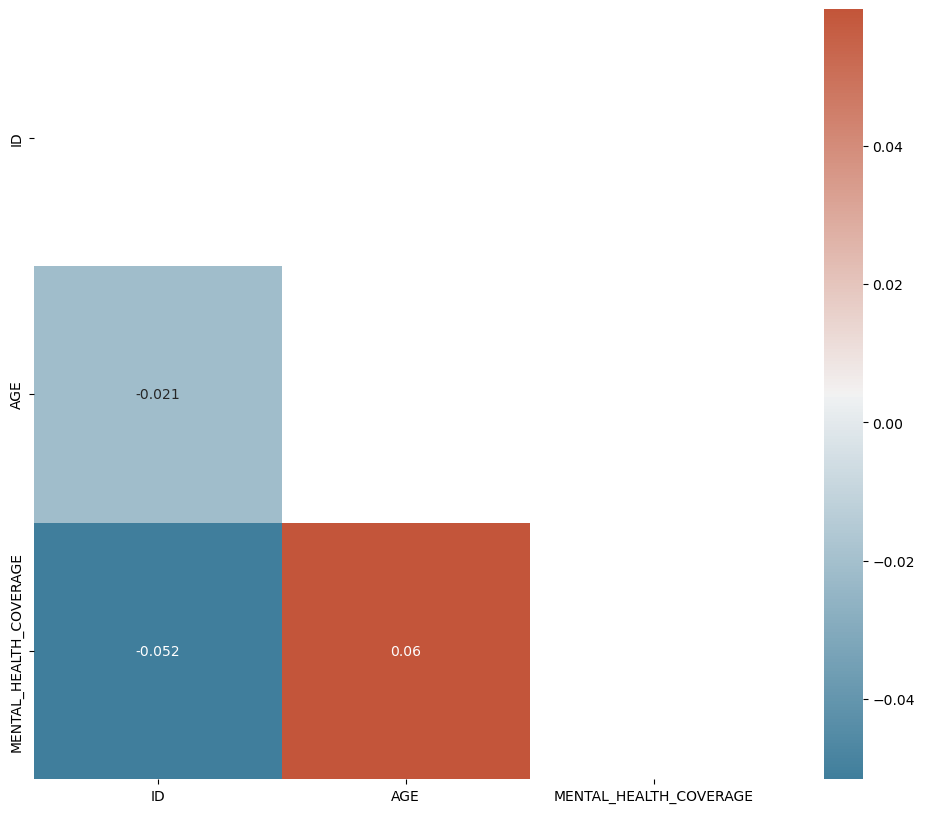

In [82]:
c=df.corr(method='pearson')

# code borrowed from Instructor Nicole L.
# Set up the matplotlib plot configuration

f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper traingle

mask = np.triu(np.ones_like(c, dtype=bool))

# Configure a custom diverging colormap

cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap

sns.heatmap(c, annot=True, mask = mask, cmap=cmap)

In [83]:
#Attempt to convert 'AGE' from string to float
df['AGE'] = df['AGE'].astype(int)

In [84]:
#Attempt to convert 'MENTAL_HEALTH_COVERAGE' from string to float
df['MENTAL_HEALTH_COVERAGE'] = df['MENTAL_HEALTH_COVERAGE'].astype(int)

In [85]:
# Check the datatypes
df.dtypes

ID                                                        int64
AGE                                                       int32
GENDER                                                   object
COUNTRY_WORKING_IN                                       object
WFH                                                      object
MENTAL_HEALTH_COVERAGE                                    int32
TECH_COMPANY                                             object
MENTAL_HEALTH_OPTIONS_UNDER_COVERAGE                     object
EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES                   object
PREV_EMPLOYERS_PROVIDE_MENTAL_HEALTH_BENEFITS            object
AWARENESS_OF_MENTAL_HEALTH_COVERAGE_BY_PREV_EMPLOYERS    object
PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES              object
MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER                  object
CURRENT_MENTAL_HEALTH_DISORDER                           object
dtype: object

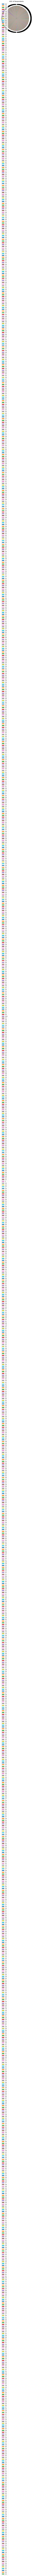

In [86]:
#Pie chart of Age of Respondants
#Maybe split this up into age ranges?
y = np.array(df['AGE'])
mylabels = (df['AGE'])
plt.pie(y, labels = mylabels)
plt.legend()
plt.title("AGE of Respondants")
plt.show()

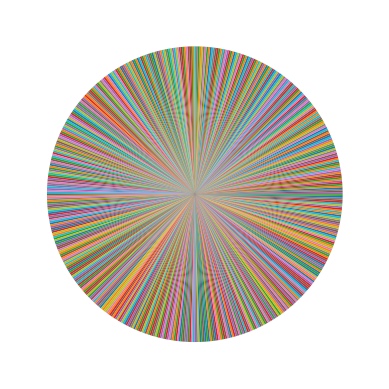

In [87]:
#mean_mh = df["MENTAL_HEALTH_COVERAGE"].mean()
y = np.array(df["MENTAL_HEALTH_COVERAGE"])

plt.pie(y)
plt.show()

[]

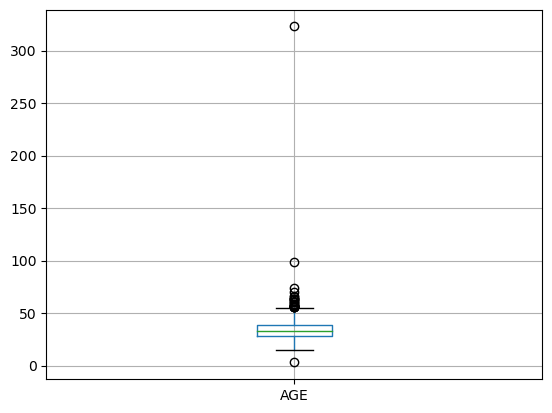

In [33]:
# Boxplot of Age column
b_plot = df.boxplot(column = 'AGE') 
b_plot.plot()

[]

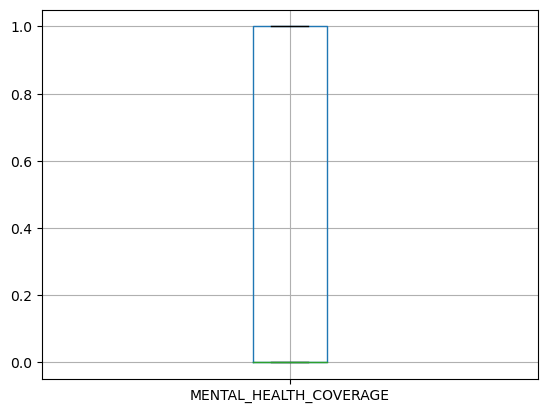

In [88]:
# Boxplot mental health coverage 
mh_plot = df.boxplot(column = 'MENTAL_HEALTH_COVERAGE') 
mh_plot.plot()

In [89]:
# Create a OneHotEncoder instance

enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list

encode_df = pd.DataFrame(enc.fit_transform(df[application_cat]))

# Add the encoded variable names to the dataframe

encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

GENDER_ Female  GENDER_AFAB  GENDER_Agender  GENDER_Androgynous  \
0             0.0          0.0             0.0                 0.0   
1             0.0          0.0             0.0                 0.0   
2             0.0          0.0             0.0                 0.0   
3             0.0          0.0             0.0                 0.0   
4             0.0          0.0             0.0                 0.0   

   GENDER_Bigender  GENDER_Cis Male  GENDER_Cis female   GENDER_Cis male  \
0              0.0              0.0                 0.0              0.0   
1              0.0              0.0                 0.0              0.0   
2              0.0              0.0                 0.0              0.0   
3              0.0              0.0                 0.0              0.0   
4              0.0              0.0                 0.0              0.0   

   GENDER_Cis-woman  GENDER_Cisgender Female  ...  \
0               0.0                      0.0  ...   
1               0.0                      0.0  ...   
2               0.0                      0.0  ...   
3               0.0                      0.0  ...   
4               0.0                      0.0  ...   

   PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES_Some did  \
0                                                0.0      
1                                                1.0      
2                                                1.0      
3                                                0.0      
4                                                0.0      

   PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES_Yes, they all did  \
0                                                0.0               
1                                                0.0               
2                                                0.0               
3                                                0.0               
4                                                0.0               

   MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER_Maybe  \
0                                            1.0   
1                                            0.0   
2                                            1.0   
3                                            0.0   
4                                            0.0   

   MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER_No, I don't think it would  \
0                                                0.0                    
1                                                1.0                    
2                                                0.0                    
3                                                0.0                    
4                                                0.0                    

   MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER_No, it has not  \
0                                                0.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER_Yes, I think it would  \
0                                                0.0               
1                                                0.0               
2                                                0.0               
3                                                1.0               
4                                                1.0               

   MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER_Yes, it has  \
0                                                0.0     
1                                                0.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   CURRENT_MENTAL_HEALTH_DISORDER_Maybe  CURRENT_MENTAL_HEALTH_DISORDER_No  \
0                                   0.0                                1.0   
1        

In [90]:
# Merge and delete encoded columns

application_df = df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

ID  AGE  MENTAL_HEALTH_COVERAGE  GENDER_ Female  GENDER_AFAB  \
0   0   39                       0             0.0          0.0   
1   1   29                       0             0.0          0.0   
2   2   38                       0             0.0          0.0   
3   3   43                       0             0.0          0.0   
4   4   43                       1             0.0          0.0   

   GENDER_Agender  GENDER_Androgynous  GENDER_Bigender  GENDER_Cis Male  \
0             0.0                 0.0              0.0              0.0   
1             0.0                 0.0              0.0              0.0   
2             0.0                 0.0              0.0              0.0   
3             0.0                 0.0              0.0              0.0   
4             0.0                 0.0              0.0              0.0   

   GENDER_Cis female   ...  \
0                 0.0  ...   
1                 0.0  ...   
2                 0.0  ...   
3                 0.0  ...   
4                 0.0  ...   

   PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES_Some did  \
0                                                0.0      
1                                                1.0      
2                                                1.0      
3                                                0.0      
4                                                0.0      

   PREV_EMPLOYER_OFFER_MENTAL_HEALTH_RESOURCES_Yes, they all did  \
0                                                0.0               
1                                                0.0               
2                                                0.0               
3                                                0.0               
4                                                0.0               

   MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER_Maybe  \
0                                            1.0   
1                                            0.0   
2                                            1.0   
3                                            0.0   
4                                            0.0   

   MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER_No, I don't think it would  \
0                                                0.0                    
1                                                1.0                    
2                                                0.0                    
3                                                0.0                    
4                                                0.0                    

   MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER_No, it has not  \
0                                                0.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER_Yes, I think it would  \
0                                                0.0               
1                                                0.0               
2                                                0.0               
3                                                1.0               
4                                                1.0               

   MENTAL_HEALTH_IDENTITY_HURT_YOUR_CAREER_Yes, it has  \
0                                                0.0     
1                                                0.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   CURRENT_MENTAL_HEALTH_DISORDER_Maybe  CURRENT_MENTAL_HEALTH_DISORDER_No  \
0                                   0.0                                1.0   
1                                   0.0                                0.0   
2                                   0.0                                1.0   
3              

In [91]:
# Create our features

X = application_df.drop(columns="MENTAL_HEALTH_COVERAGE").values

# Create our target
y =application_df['MENTAL_HEALTH_COVERAGE'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y)

Counter(y_train)

Counter({1: 398, 0: 676})

In [92]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [93]:
# Fitting the model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
   max_iter=200,
   random_state=1)

classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [94]:
# Making predictions using the testing data.

y_pred = classifier.predict(X_test)

In [95]:
# Calculated the balanced accuracy score

from sklearn.metrics import accuracy_score

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.8328690807799443

In [96]:
# Display the confusion matrix
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
cm_df

Predicted 0  Predicted 1
Actual 0          204           22
Actual 1           38           95

In [97]:
# Print the imbalanced classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       226
           1       0.81      0.71      0.76       133

    accuracy                           0.83       359
   macro avg       0.83      0.81      0.82       359
weighted avg       0.83      0.83      0.83       359

